In [5]:
# Explanation of prediction output when activation is sigmoid:
# https://forum.freecodecamp.org/t/model-predict-output/470349

import tensorflow as tf
import tensorflow_datasets as tfds
import logging, os
import pandas as pd
import time
from tensorflow.keras.models import load_model
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

BASE_PATH = "../../../../../local_data/practice/tfds/"
DATA_PATH = "../../../../../local_data/tfds/"
OUTPUT_PATH = BASE_PATH+"cats_vs_dogs/"
os.system("mkdir -p " + OUTPUT_PATH)

# Load the dataset
(train_dataset, test_dataset), metadata = tfds.load(
    'cats_vs_dogs',
    data_dir=DATA_PATH,
    split=['train[:80%]', 'train[80%:]'],
    # split=['train[:80%]', 'train[99%:]'],
    with_info=True,
    as_supervised=True
)

print(f"Number of test samples: {test_dataset.cardinality()}")

Number of test samples: 4652


In [6]:
# Preprocess the data
def preprocess(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [256, 256])
    image = image / 255.0
    return image, label

print("train_dataset=",train_dataset)
train_dataset = train_dataset.map(preprocess)
test_dataset = test_dataset.map(preprocess)

batch_size = 64
train_dataset = train_dataset.cache().batch(batch_size).prefetch(buffer_size=10)
test_dataset = test_dataset.cache().batch(batch_size).prefetch(buffer_size=10)

train_dataset= <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [7]:
# Load model
filename = "valacc_0.641_epochs_10_date_20250719-150250.h5"

fullpath = f"{OUTPUT_PATH}{filename}"
model = load_model(fullpath)
model.summary()


# Make predictions
predictions = model.predict(test_dataset)
allpreds=predictions.flatten()
allpnorms = np.where(allpreds > 0.5, 1, 0)

alllabels=np.empty(0)
for images, labels in test_dataset:
    alllabels = np.append(alllabels, labels.numpy().flatten())

score = metrics.accuracy_score(alllabels, allpnorms)
print("Validation accuracy score: {}".format(score))

collabels = pd.DataFrame(alllabels, columns=["l"])
colpreds = pd.DataFrame( allpreds, columns=["pred"])
pnorm = pd.DataFrame( allpnorms, columns=["pnorm"])
diff = collabels["l"] - pnorm["pnorm"]

compare = pd.concat([collabels, colpreds,pnorm,diff], axis=1)
compare.columns = ["l", "pred", "pnorm","diff"]
print(compare)

compare.to_csv(OUTPUT_PATH + "pred_test_load.csv", index=False)    

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 246016)            0         
                                                                 
 dense_10 (Dense)            (None, 512)              

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


29/73 [==========>...................] - ETA: 0s

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


73/73 [==============================] - 1s 18ms/step
Validation accuracy score: 0.633920894239037
        l      pred  pnorm  diff
0     1.0  0.325649      0   1.0
1     0.0  0.568598      1  -1.0
2     1.0  0.990558      1   0.0
3     1.0  0.643807      1   0.0
4     1.0  0.727627      1   0.0
...   ...       ...    ...   ...
4647  0.0  0.323462      0   0.0
4648  0.0  0.245304      0   0.0
4649  0.0  0.371580      0   0.0
4650  1.0  0.882426      1   0.0
4651  0.0  0.645501      1  -1.0

[4652 rows x 4 columns]


,image,label,predictions,pred norm,correct
0,,1 (dog),0.325649,0,False
1,,0 (cat),0.568598,1,False
2,,1 (dog),0.990558,1,True
3,,1 (dog),0.643807,1,True
4,,1 (dog),0.727627,1,True
5,,1 (dog),0.998966,1,True
6,,0 (cat),0.000810,0,True
7,,1 (dog),0.674704,1,True
8,,1 (dog),0.982643,1,True
9,,0 (cat),0.087424,0,True

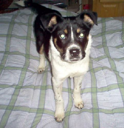
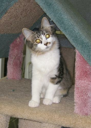
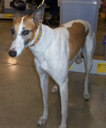
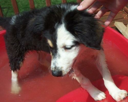
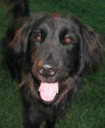
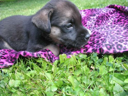
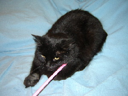
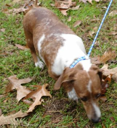
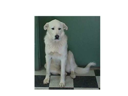
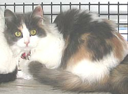

In [8]:
# Load the dataset
(train_dataset, test_dataset), metadata = tfds.load(
    'cats_vs_dogs',
    data_dir=DATA_PATH,
    # split=['train[:80%]', 'train[80%:]'],
    split=['train[:80%]', 'train[99%:]'],
    with_info=True,
    as_supervised=True
)
number_of_images=10
allcorrect = (allpnorms == alllabels)

new_df=tfds.as_dataframe(test_dataset.take(number_of_images), metadata)
# new_df
new_df['predictions'] = allpreds[0:number_of_images]
new_df['pred norm'] = allpnorms[0:number_of_images]
new_df['correct'] = allcorrect[0:number_of_images]
new_df